## Generating an eigenpulse timeseries from known pulsar timeseries

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#import dedispersion
#import filterbankio
SOURCE_PATH = '/home/inigo/pulseClassifier/src/'
import imp #importing package
dedispersion = imp.load_source('dedispersion', SOURCE_PATH + 'dedispersion.py')
filterbankio = imp.load_source('filterbankio', SOURCE_PATH + 'filterbankio.py')


In [2]:
pulsarpath = '/data2/griffin/ALFABURST/pulses'
pulsebanks = glob.glob(pulsarpath + '/*.fil') #create an array full of pulse files
print 'There are %d pulses in ' %(len(pulsebanks)) + pulsarpath

There are 685 pulses in /data2/griffin/ALFABURST/pulses


### Create tuples of file name - dm

In [3]:
#TEMPORARY WORK AROUND UNTIL I CAN COPY TXT FILES TO BOLTFLASH!

dmvalues = []

for txtfile in os.listdir('./pulses/'): #pull all file names 
    path = './pulses/' + txtfile   
    pulsar = open(path, 'r')    
    firstline = True

        
    for line in pulsar:
        if firstline:             
            dm = float(line) #save DM value
            firstline = False #go to next part of for loop
        
        else:           
            line = line[:-8]
            if line[-1] == '.':
                line = line[:-1] #remove extra character from files which have 2 digit decimation (d64/32/16)

            #create tuples of name and dm
            tup = (line, dm)
            dmvalues.append(tup)

#dmvalues = [('Beam0_fb_D20150705T105826.buffer1', 96.91), ('Beam0_fb_D20150705T105826.buffer2', 96.91), ('Beam0_fb_D20150705T110552.buffer1', 96.91), ('Beam0_fb_D20150705T110552.buffer2', 96.91), ('Beam0_fb_D20150705T110552.buffer3', 96.91), ('Beam0_fb_D20150705T110552.buffer4', 96.91), ('Beam0_fb_D20150705T110552.buffer6', 96.91), ('Beam0_fb_D20150705T110552.buffer8', 96.91), ('Beam0_fb_D20150705T111619.buffer1', 96.91), ('Beam0_fb_D20150705T111619.buffer2', 96.91), ('Beam0_fb_D20150705T111619.buffer3', 96.91), ('Beam0_fb_D20150705T111619.buffer4', 96.91), ('Beam0_fb_D20150705T111619.buffer5', 96.91), ('Beam0_fb_D20150705T111619.buffer6', 96.91), ('Beam0_fb_D20150705T111619.buffer7', 96.91), ('Beam0_fb_D20150705T114601.buffer10', 96.91), ('Beam0_fb_D20150705T114601.buffer11', 96.91), ('Beam0_fb_D20150705T114601.buffer12', 96.91), ('Beam0_fb_D20150705T114601.buffer13', 96.91), ('Beam0_fb_D20150705T114601.buffer14', 96.91), ('Beam0_fb_D20150705T114601.buffer15', 96.91), ('Beam0_fb_D20150705T114601.buffer16', 96.91), ('Beam0_fb_D20150705T114601.buffer17', 96.91), ('Beam0_fb_D20150705T114601.buffer18', 96.91), ('Beam0_fb_D20150705T114601.buffer19', 96.91), ('Beam0_fb_D20150705T114601.buffer1', 96.91), ('Beam0_fb_D20150705T114601.buffer20', 96.91), ('Beam0_fb_D20150705T114601.buffer21', 96.91), ('Beam0_fb_D20150705T114601.buffer22', 96.91), ('Beam0_fb_D20150705T114601.buffer23', 96.91), ('Beam0_fb_D20150705T114601.buffer24', 96.91), ('Beam0_fb_D20150705T114601.buffer25', 96.91), ('Beam0_fb_D20150705T114601.buffer26', 96.91), ('Beam0_fb_D20150705T114601.buffer27', 96.91), ('Beam0_fb_D20150705T114601.buffer28', 96.91), ('Beam0_fb_D20150705T114601.buffer29', 96.91), ('Beam0_fb_D20150705T114601.buffer2', 96.91), ('Beam0_fb_D20150705T114601.buffer30', 96.91), ('Beam0_fb_D20150705T114601.buffer31', 96.91), ('Beam0_fb_D20150705T114601.buffer32', 96.91), ('Beam0_fb_D20150705T114601.buffer33', 96.91), ('Beam0_fb_D20150705T114601.buffer34', 96.91), ('Beam0_fb_D20150705T114601.buffer35', 96.91), ('Beam0_fb_D20150705T114601.buffer36', 96.91), ('Beam0_fb_D20150705T114601.buffer37', 96.91), ('Beam0_fb_D20150705T114601.buffer38', 96.91), ('Beam0_fb_D20150705T114601.buffer39', 96.91), ('Beam0_fb_D20150705T114601.buffer3', 96.91), ('Beam0_fb_D20150705T114601.buffer40', 96.91), ('Beam0_fb_D20150705T114601.buffer41', 96.91), ('Beam0_fb_D20150705T114601.buffer42', 96.91), ('Beam0_fb_D20150705T114601.buffer43', 96.91), ('Beam0_fb_D20150705T114601.buffer44', 96.91), ('Beam0_fb_D20150705T114601.buffer45', 96.91), ('Beam0_fb_D20150705T114601.buffer46', 96.91), ('Beam0_fb_D20150705T114601.buffer47', 96.91), ('Beam0_fb_D20150705T114601.buffer4', 96.91), ('Beam0_fb_D20150705T114601.buffer5', 96.91), ('Beam0_fb_D20150705T114601.buffer6', 96.91), ('Beam0_fb_D20150705T114601.buffer7', 96.91), ('Beam0_fb_D20150705T114601.buffer8', 96.91), ('Beam0_fb_D20150705T114601.buffer9', 96.91), ('Beam0_fb_D20150705T120420.buffer1', 96.91), ('Beam0_fb_D20150705T120420.buffer2', 96.91), ('Beam0_fb_D20150705T120420.buffer3', 96.91), ('Beam0_fb_D20150705T120420.buffer4', 96.91), ('Beam0_fb_D20150705T120609.buffer1', 96.91), ('Beam0_fb_D20150705T120609.buffer2', 96.91), ('Beam0_fb_D20150705T120609.buffer3', 96.91), ('Beam0_fb_D20150705T121259.buffer10', 96.91), ('Beam0_fb_D20150705T121259.buffer11', 96.91), ('Beam0_fb_D20150705T121259.buffer12', 96.91), ('Beam0_fb_D20150705T121259.buffer13', 96.91), ('Beam0_fb_D20150705T121259.buffer14', 96.91), ('Beam0_fb_D20150705T121259.buffer15', 96.91), ('Beam0_fb_D20150705T121259.buffer16', 96.91), ('Beam0_fb_D20150705T121259.buffer17', 96.91), ('Beam0_fb_D20150705T121259.buffer18', 96.91), ('Beam0_fb_D20150705T121259.buffer19', 96.91), ('Beam0_fb_D20150705T121259.buffer1', 96.91), ('Beam0_fb_D20150705T121259.buffer20', 96.91), ('Beam0_fb_D20150705T121259.buffer21', 96.91), ('Beam0_fb_D20150705T121259.buffer22', 96.91), ('Beam0_fb_D20150705T121259.buffer2', 96.91), ('Beam0_fb_D20150705T121259.buffer3', 96.91), ('Beam0_fb_D20150705T121259.buffer4', 96.91), ('Beam0_fb_D20150705T121259.buffer5', 96.91), ('Beam0_fb_D20150705T121259.buffer6', 96.91), ('Beam0_fb_D20150705T121259.buffer7', 96.91), ('Beam0_fb_D20150705T121259.buffer8', 96.91), ('Beam0_fb_D20150705T121259.buffer9', 96.91), ('Beam1_fb_D20150705T111953.buffer1', 96.91), ('Beam1_fb_D20150705T111953.buffer2', 96.91), ('Beam1_fb_D20150705T111953.buffer3', 96.91), ('Beam1_fb_D20150705T111953.buffer4', 96.91), ('Beam1_fb_D20150705T111953.buffer6', 96.91), ('Beam1_fb_D20150705T111953.buffer7', 96.91), ('Beam4_fb_D20150705T112951.buffer1', 96.91), ('Beam4_fb_D20150705T112951.buffer2', 96.91), ('Beam4_fb_D20150705T112951.buffer3', 96.91), ('Beam4_fb_D20150705T112951.buffer4', 96.91), ('Beam4_fb_D20150705T112951.buffer5', 96.91), ('Beam4_fb_D20150705T112951.buffer6', 96.91), ('Beam4_fb_D20150705T112951.buffer7', 96.91), ('Beam5_fb_D20150705T113304.buffer1', 96.91), ('Beam5_fb_D20150705T113304.buffer2', 96.91), ('Beam5_fb_D20150705T113304.buffer3', 96.91), ('Beam5_fb_D20150705T113304.buffer4', 96.91), ('Beam5_fb_D20150705T113304.buffer5', 96.91), ('Beam5_fb_D20150705T113304.buffer6', 96.91), ('Beam5_fb_D20150705T113304.buffer7', 96.91), ('Beam6_fb_D20150705T113618.buffer1', 96.91), ('Beam6_fb_D20150705T113618.buffer2', 96.91), ('Beam6_fb_D20150705T113618.buffer3', 96.91), ('Beam6_fb_D20150705T113618.buffer4', 96.91), ('Beam6_fb_D20150705T113618.buffer5', 96.91), ('Beam6_fb_D20150705T113618.buffer6', 96.91), ('Beam6_fb_D20150705T113618.buffer7', 96.91), ('Beam6_fb_D20150705T113618.buffer8', 96.91), ('Beam6_fb_D20150705T113618.buffer9', 96.91), ('Beam0_fb_D20160702T170304.buffer10', 4.84066), ('Beam0_fb_D20160703T171704.buffer10', 4.84066), ('Beam0_fb_D20160703T171704.buffer12', 4.84066), ('Beam0_fb_D20160703T171704.buffer13', 4.84066), ('Beam0_fb_D20160703T171704.buffer14', 4.84066), ('Beam0_fb_D20160703T171704.buffer15', 4.84066), ('Beam0_fb_D20160703T171704.buffer4', 4.84066), ('Beam0_fb_D20160703T171704.buffer5', 4.84066), ('Beam0_fb_D20160703T171704.buffer6', 4.84066), ('Beam0_fb_D20160703T171704.buffer7', 4.84066), ('Beam0_fb_D20160703T171704.buffer8', 4.84066), ('Beam0_fb_D20160703T171704.buffer9', 4.84066), ('Beam0_fb_D20160710T164704.buffer5', 4.84066), ('Beam0_fb_D20160716T160204.buffer6', 4.84066), ('Beam0_fb_D20160724T153203.buffer3', 4.84066), ('Beam0_fb_D20160724T153203.buffer4', 4.84066), ('Beam0_fb_D20160807T111603.buffer12', 4.84066), ('Beam0_fb_D20160807T111603.buffer13', 4.84066), ('Beam0_fb_D20160821T133104.buffer4', 4.84066), ('Beam0_fb_D20160821T133104.buffer5', 4.84066), ('Beam0_fb_D20160821T133104.buffer6', 4.84066), ('Beam0_fb_D20161015T094603.buffer2', 4.84066), ('Beam0_fb_D20161015T094603.buffer3', 4.84066), ('Beam0_fb_D20161022T091504.buffer5', 4.84066), ('Beam0_fb_D20161022T091504.buffer6', 4.84066), ('Beam0_fb_D20161022T091504.buffer7', 4.84066), ('Beam0_fb_D20161029T091503.buffer3', 4.84066), ('Beam0_fb_D20161111T083104.buffer2', 4.84066), ('Beam0_fb_D20161111T083104.buffer3', 4.84066), ('Beam0_fb_D20161118T074503.buffer5', 4.84066), ('Beam0_fb_D20161120T074804.buffer5', 4.84066), ('Beam0_fb_D20161120T074804.buffer6', 4.84066), ('Beam0_fb_D20161120T074804.buffer7', 4.84066), ('Beam0_fb_D20161120T074804.buffer8', 4.84066), ('Beam0_fb_D20161124T073304.buffer4', 4.84066), ('Beam0_fb_D20161124T073304.buffer5', 4.84066), ('Beam0_fb_D20161204T064804.buffer10', 4.84066), ('Beam0_fb_D20161204T064804.buffer11', 4.84066), ('Beam0_fb_D20161204T064804.buffer12', 4.84066), ('Beam0_fb_D20161204T064804.buffer13', 4.84066), ('Beam0_fb_D20161204T064804.buffer14', 4.84066), ('Beam0_fb_D20161204T064804.buffer15', 4.84066), ('Beam0_fb_D20161204T064804.buffer4', 4.84066), ('Beam0_fb_D20161204T064804.buffer5', 4.84066), ('Beam0_fb_D20161204T064804.buffer6', 4.84066), ('Beam0_fb_D20161204T064804.buffer7', 4.84066), ('Beam0_fb_D20161204T064804.buffer8', 4.84066), ('Beam0_fb_D20161204T064804.buffer9', 4.84066), ('Beam0_fb_D20150909T195304.buffer150', 142.88), ('Beam0_fb_D20150909T195304.buffer151', 142.88), ('Beam0_fb_D20150909T195304.buffer152', 142.88), ('Beam0_fb_D20150909T195304.buffer153', 142.88), ('Beam0_fb_D20150909T195304.buffer160', 142.88), ('Beam0_fb_D20150909T195304.buffer163', 142.88), ('Beam0_fb_D20150909T195304.buffer164', 142.88), ('Beam0_fb_D20160913T190303.buffer11', 360.0), ('Beam0_fb_D20160913T190303.buffer12', 360.0), ('Beam0_fb_D20160913T190303.buffer13', 360.0), ('Beam6_fb_D20151126T135804.buffer447', 158.521), ('Beam6_fb_D20160129T195403.buffer34', 77.7026), ('Beam0_fb_D20150812T212008.buffer14', 241.693), ('Beam0_fb_D20150812T212008.buffer16', 241.693), ('Beam0_fb_D20150812T212008.buffer18', 241.693), ('Beam0_fb_D20150812T212008.buffer19', 241.693), ('Beam0_fb_D20150812T212008.buffer21', 241.693), ('Beam0_fb_D20150812T212008.buffer22', 241.693), ('Beam0_fb_D20150812T212008.buffer23', 241.693), ('Beam0_fb_D20150812T212008.buffer24', 241.693), ('Beam0_fb_D20150812T212008.buffer4', 241.693), ('Beam0_fb_D20150812T212008.buffer5', 241.693), ('Beam0_fb_D20150812T212008.buffer6', 241.693), ('Beam0_fb_D20150812T212008.buffer8', 241.693), ('Beam0_fb_D20150812T212008.buffer9', 241.693), ('Beam0_fb_D20150823T203704.buffer2', 241.693), ('Beam6_fb_D20150806T220504.buffer2', 241.693), ('Beam0_fb_D20150801T220510.buffer17', 245.167), ('Beam0_fb_D20150802T222012.buffer37', 245.167), ('Beam0_fb_D20150802T222012.buffer46', 245.167), ('Beam1_fb_D20150801T220510.buffer10', 245.167), ('Beam1_fb_D20150801T220510.buffer11', 245.167), ('Beam1_fb_D20150801T220510.buffer12', 245.167), ('Beam1_fb_D20150801T220510.buffer13', 245.167), ('Beam1_fb_D20150801T220510.buffer14', 245.167), ('Beam1_fb_D20150801T220510.buffer15', 245.167), ('Beam1_fb_D20150801T220510.buffer16', 245.167), ('Beam1_fb_D20150801T220510.buffer17', 245.167), ('Beam1_fb_D20150801T220510.buffer18', 245.167), ('Beam1_fb_D20150801T220510.buffer19', 245.167), ('Beam1_fb_D20150801T220510.buffer20', 245.167), ('Beam1_fb_D20150801T220510.buffer22', 245.167), ('Beam1_fb_D20150801T220510.buffer23', 245.167), ('Beam1_fb_D20150801T220510.buffer24', 245.167), 
 #('Beam1_fb_D20150801T220510.buffer25', 245.167), ('Beam1_fb_D20150801T220510.buffer26', 245.167), ('Beam1_fb_D20150801T220510.buffer27', 245.167), ('Beam1_fb_D20150801T220510.buffer28', 245.167), ('Beam1_fb_D20150801T220510.buffer29', 245.167), ('Beam1_fb_D20150801T220510.buffer30', 245.167), ('Beam1_fb_D20150801T220510.buffer31', 245.167), ('Beam1_fb_D20150801T220510.buffer6', 245.167), ('Beam1_fb_D20150801T220510.buffer8', 245.167), ('Beam1_fb_D20150801T220510.buffer9', 245.167), ('Beam6_fb_D20150802T222012.buffer16', 245.167), ('Beam6_fb_D20150802T222012.buffer6', 245.167), ('Beam0_fb_D20160214T075024.buffer10', 48.66823), ('Beam0_fb_D20160214T075024.buffer11', 48.66823), ('Beam0_fb_D20160214T075024.buffer12', 48.66823), ('Beam0_fb_D20160214T075024.buffer14', 48.66823), ('Beam0_fb_D20160214T075024.buffer15', 48.66823), ('Beam0_fb_D20160214T075024.buffer17', 48.66823), ('Beam0_fb_D20160214T075024.buffer19', 48.66823), ('Beam0_fb_D20160214T075024.buffer1', 48.66823), ('Beam0_fb_D20160214T075024.buffer20', 48.66823), ('Beam0_fb_D20160214T075024.buffer21', 48.66823), ('Beam0_fb_D20160214T075024.buffer22', 48.66823), ('Beam0_fb_D20160214T075024.buffer23', 48.66823), ('Beam0_fb_D20160214T075024.buffer24', 48.66823), ('Beam0_fb_D20160214T075024.buffer25', 48.66823), ('Beam0_fb_D20160214T075024.buffer26', 48.66823), ('Beam0_fb_D20160214T075024.buffer27', 48.66823), ('Beam0_fb_D20160214T075024.buffer28', 48.66823), ('Beam0_fb_D20160214T075024.buffer2', 48.66823), ('Beam0_fb_D20160214T075024.buffer30', 48.66823), ('Beam0_fb_D20160214T075024.buffer32', 48.66823), ('Beam0_fb_D20160214T075024.buffer33', 48.66823), ('Beam0_fb_D20160214T075024.buffer34', 48.66823), ('Beam0_fb_D20160214T075024.buffer35', 48.66823), ('Beam0_fb_D20160214T075024.buffer36', 48.66823), ('Beam0_fb_D20160214T075024.buffer37', 48.66823), ('Beam0_fb_D20160214T075024.buffer38', 48.66823), ('Beam0_fb_D20160214T075024.buffer39', 48.66823), ('Beam0_fb_D20160214T075024.buffer3', 48.66823), ('Beam0_fb_D20160214T075024.buffer40', 48.66823), ('Beam0_fb_D20160214T075024.buffer41', 48.66823), ('Beam0_fb_D20160214T075024.buffer42', 48.66823), ('Beam0_fb_D20160214T075024.buffer43', 48.66823), ('Beam0_fb_D20160214T075024.buffer44', 48.66823), ('Beam0_fb_D20160214T075024.buffer45', 48.66823), ('Beam0_fb_D20160214T075024.buffer46', 48.66823), ('Beam0_fb_D20160214T075024.buffer47', 48.66823), ('Beam0_fb_D20160214T075024.buffer49', 48.66823), ('Beam0_fb_D20160214T075024.buffer4', 48.66823), ('Beam0_fb_D20160214T075024.buffer50', 48.66823), ('Beam0_fb_D20160214T075024.buffer51', 48.66823), ('Beam0_fb_D20160214T075024.buffer52', 48.66823), ('Beam0_fb_D20160214T075024.buffer5', 48.66823), ('Beam0_fb_D20160214T075024.buffer7', 48.66823), ('Beam0_fb_D20160214T075024.buffer8', 48.66823), ('Beam0_fb_D20160214T075024.buffer9', 48.66823), ('Beam0_fb_D20160214T080542.buffer1', 48.66823), ('Beam0_fb_D20160214T080542.buffer2', 48.66823), ('Beam0_fb_D20160214T080542.buffer3', 48.66823), ('Beam0_fb_D20160214T080542.buffer4', 48.66823), ('Beam0_fb_D20160214T080542.buffer5', 48.66823), ('Beam0_fb_D20160214T081408.buffer100', 48.66823), ('Beam0_fb_D20160214T081408.buffer101', 48.66823), ('Beam0_fb_D20160214T081408.buffer102', 48.66823), ('Beam0_fb_D20160214T081408.buffer103', 48.66823), ('Beam0_fb_D20160214T081408.buffer104', 48.66823), ('Beam0_fb_D20160214T081408.buffer105', 48.66823), ('Beam0_fb_D20160214T081408.buffer106', 48.66823), ('Beam0_fb_D20160214T081408.buffer107', 48.66823), ('Beam0_fb_D20160214T081408.buffer108', 48.66823), ('Beam0_fb_D20160214T081408.buffer109', 48.66823), ('Beam0_fb_D20160214T081408.buffer10', 48.66823), ('Beam0_fb_D20160214T081408.buffer110', 48.66823), ('Beam0_fb_D20160214T081408.buffer111', 48.66823), ('Beam0_fb_D20160214T081408.buffer112', 48.66823), ('Beam0_fb_D20160214T081408.buffer113', 48.66823), ('Beam0_fb_D20160214T081408.buffer114', 48.66823), ('Beam0_fb_D20160214T081408.buffer115', 48.66823), ('Beam0_fb_D20160214T081408.buffer116', 48.66823), ('Beam0_fb_D20160214T081408.buffer117', 48.66823), ('Beam0_fb_D20160214T081408.buffer118', 48.66823), ('Beam0_fb_D20160214T081408.buffer119', 48.66823), ('Beam0_fb_D20160214T081408.buffer11', 48.66823), ('Beam0_fb_D20160214T081408.buffer120', 48.66823), ('Beam0_fb_D20160214T081408.buffer121', 48.66823), ('Beam0_fb_D20160214T081408.buffer122', 48.66823), ('Beam0_fb_D20160214T081408.buffer123', 48.66823), ('Beam0_fb_D20160214T081408.buffer124', 48.66823), ('Beam0_fb_D20160214T081408.buffer125', 48.66823), ('Beam0_fb_D20160214T081408.buffer126', 48.66823), ('Beam0_fb_D20160214T081408.buffer127', 48.66823), ('Beam0_fb_D20160214T081408.buffer128', 48.66823), ('Beam0_fb_D20160214T081408.buffer129', 48.66823), ('Beam0_fb_D20160214T081408.buffer12', 48.66823), ('Beam0_fb_D20160214T081408.buffer130', 48.66823), ('Beam0_fb_D20160214T081408.buffer131', 48.66823), ('Beam0_fb_D20160214T081408.buffer132', 48.66823), ('Beam0_fb_D20160214T081408.buffer133', 48.66823), ('Beam0_fb_D20160214T081408.buffer134', 48.66823), ('Beam0_fb_D20160214T081408.buffer135', 48.66823), ('Beam0_fb_D20160214T081408.buffer136', 48.66823), ('Beam0_fb_D20160214T081408.buffer137', 48.66823), ('Beam0_fb_D20160214T081408.buffer138', 48.66823), ('Beam0_fb_D20160214T081408.buffer139', 48.66823), ('Beam0_fb_D20160214T081408.buffer13', 48.66823), ('Beam0_fb_D20160214T081408.buffer140', 48.66823), ('Beam0_fb_D20160214T081408.buffer141', 48.66823), ('Beam0_fb_D20160214T081408.buffer142', 48.66823), ('Beam0_fb_D20160214T081408.buffer143', 48.66823), ('Beam0_fb_D20160214T081408.buffer144', 48.66823), ('Beam0_fb_D20160214T081408.buffer145', 48.66823), ('Beam0_fb_D20160214T081408.buffer146', 48.66823), ('Beam0_fb_D20160214T081408.buffer147', 48.66823), ('Beam0_fb_D20160214T081408.buffer148', 48.66823), ('Beam0_fb_D20160214T081408.buffer149', 48.66823), ('Beam0_fb_D20160214T081408.buffer14', 48.66823), ('Beam0_fb_D20160214T081408.buffer150', 48.66823), ('Beam0_fb_D20160214T081408.buffer151', 48.66823), ('Beam0_fb_D20160214T081408.buffer152', 48.66823), ('Beam0_fb_D20160214T081408.buffer153', 48.66823), ('Beam0_fb_D20160214T081408.buffer154', 48.66823), ('Beam0_fb_D20160214T081408.buffer155', 48.66823), ('Beam0_fb_D20160214T081408.buffer156', 48.66823), ('Beam0_fb_D20160214T081408.buffer157', 48.66823), ('Beam0_fb_D20160214T081408.buffer158', 48.66823), ('Beam0_fb_D20160214T081408.buffer159', 48.66823), ('Beam0_fb_D20160214T081408.buffer160', 48.66823), ('Beam0_fb_D20160214T081408.buffer161', 48.66823), ('Beam0_fb_D20160214T081408.buffer162', 48.66823), ('Beam0_fb_D20160214T081408.buffer163', 48.66823), ('Beam0_fb_D20160214T081408.buffer164', 48.66823), ('Beam0_fb_D20160214T081408.buffer165', 48.66823), ('Beam0_fb_D20160214T081408.buffer166', 48.66823), ('Beam0_fb_D20160214T081408.buffer167', 48.66823), ('Beam0_fb_D20160214T081408.buffer168', 48.66823), ('Beam0_fb_D20160214T081408.buffer169', 48.66823), ('Beam0_fb_D20160214T081408.buffer16', 48.66823), ('Beam0_fb_D20160214T081408.buffer170', 48.66823), ('Beam0_fb_D20160214T081408.buffer171', 48.66823), ('Beam0_fb_D20160214T081408.buffer172', 48.66823), ('Beam0_fb_D20160214T081408.buffer173', 48.66823), ('Beam0_fb_D20160214T081408.buffer174', 48.66823), ('Beam0_fb_D20160214T081408.buffer175', 48.66823), ('Beam0_fb_D20160214T081408.buffer176', 48.66823), ('Beam0_fb_D20160214T081408.buffer177', 48.66823), ('Beam0_fb_D20160214T081408.buffer178', 48.66823), ('Beam0_fb_D20160214T081408.buffer179', 48.66823), ('Beam0_fb_D20160214T081408.buffer17', 48.66823), ('Beam0_fb_D20160214T081408.buffer180', 48.66823), ('Beam0_fb_D20160214T081408.buffer181', 48.66823), ('Beam0_fb_D20160214T081408.buffer182', 48.66823), ('Beam0_fb_D20160214T081408.buffer183', 48.66823), ('Beam0_fb_D20160214T081408.buffer184', 48.66823), ('Beam0_fb_D20160214T081408.buffer185', 48.66823), ('Beam0_fb_D20160214T081408.buffer186', 48.66823), ('Beam0_fb_D20160214T081408.buffer187', 48.66823), ('Beam0_fb_D20160214T081408.buffer188', 48.66823), ('Beam0_fb_D20160214T081408.buffer189', 48.66823), ('Beam0_fb_D20160214T081408.buffer18', 48.66823), ('Beam0_fb_D20160214T081408.buffer190', 48.66823), ('Beam0_fb_D20160214T081408.buffer19', 48.66823), ('Beam0_fb_D20160214T081408.buffer1', 48.66823), ('Beam0_fb_D20160214T081408.buffer20', 48.66823), ('Beam0_fb_D20160214T081408.buffer21', 48.66823), ('Beam0_fb_D20160214T081408.buffer22', 48.66823), ('Beam0_fb_D20160214T081408.buffer23', 48.66823), ('Beam0_fb_D20160214T081408.buffer24', 48.66823), ('Beam0_fb_D20160214T081408.buffer25', 48.66823), ('Beam0_fb_D20160214T081408.buffer26', 48.66823), ('Beam0_fb_D20160214T081408.buffer27', 48.66823), ('Beam0_fb_D20160214T081408.buffer28', 48.66823), ('Beam0_fb_D20160214T081408.buffer29', 48.66823), ('Beam0_fb_D20160214T081408.buffer2', 48.66823), ('Beam0_fb_D20160214T081408.buffer30', 48.66823), ('Beam0_fb_D20160214T081408.buffer31', 48.66823), ('Beam0_fb_D20160214T081408.buffer32', 48.66823), ('Beam0_fb_D20160214T081408.buffer33', 48.66823), ('Beam0_fb_D20160214T081408.buffer34', 48.66823), ('Beam0_fb_D20160214T081408.buffer36', 48.66823), ('Beam0_fb_D20160214T081408.buffer37', 48.66823), ('Beam0_fb_D20160214T081408.buffer38', 48.66823), ('Beam0_fb_D20160214T081408.buffer39', 48.66823), ('Beam0_fb_D20160214T081408.buffer3', 48.66823), ('Beam0_fb_D20160214T081408.buffer40', 48.66823), ('Beam0_fb_D20160214T081408.buffer41', 48.66823), ('Beam0_fb_D20160214T081408.buffer42', 48.66823), ('Beam0_fb_D20160214T081408.buffer43', 48.66823), ('Beam0_fb_D20160214T081408.buffer44', 48.66823), ('Beam0_fb_D20160214T081408.buffer45', 48.66823), ('Beam0_fb_D20160214T081408.buffer46', 48.66823), ('Beam0_fb_D20160214T081408.buffer47', 48.66823), ('Beam0_fb_D20160214T081408.buffer48', 48.66823), ('Beam0_fb_D20160214T081408.buffer49', 48.66823), ('Beam0_fb_D20160214T081408.buffer4', 48.66823), ('Beam0_fb_D20160214T081408.buffer50', 48.66823), ('Beam0_fb_D20160214T081408.buffer51', 48.66823), ('Beam0_fb_D20160214T081408.buffer52', 48.66823), ('Beam0_fb_D20160214T081408.buffer53', 48.66823), ('Beam0_fb_D20160214T081408.buffer54', 48.66823), ('Beam0_fb_D20160214T081408.buffer55', 48.66823), ('Beam0_fb_D20160214T081408.buffer56', 48.66823), ('Beam0_fb_D20160214T081408.buffer57', 48.66823), ('Beam0_fb_D20160214T081408.buffer58', 48.66823), ('Beam0_fb_D20160214T081408.buffer59', 48.66823), ('Beam0_fb_D20160214T081408.buffer5', 48.66823), ('Beam0_fb_D20160214T081408.buffer60', 48.66823), ('Beam0_fb_D20160214T081408.buffer62', 48.66823), ('Beam0_fb_D20160214T081408.buffer63', 48.66823), ('Beam0_fb_D20160214T081408.buffer64', 48.66823), ('Beam0_fb_D20160214T081408.buffer65', 48.66823), ('Beam0_fb_D20160214T081408.buffer66', 48.66823), ('Beam0_fb_D20160214T081408.buffer67', 48.66823), ('Beam0_fb_D20160214T081408.buffer68', 48.66823), ('Beam0_fb_D20160214T081408.buffer69', 48.66823), ('Beam0_fb_D20160214T081408.buffer6', 48.66823), ('Beam0_fb_D20160214T081408.buffer70', 48.66823), ('Beam0_fb_D20160214T081408.buffer71', 48.66823), ('Beam0_fb_D20160214T081408.buffer72', 48.66823), ('Beam0_fb_D20160214T081408.buffer73', 48.66823), ('Beam0_fb_D20160214T081408.buffer74', 48.66823), ('Beam0_fb_D20160214T081408.buffer75', 48.66823), ('Beam0_fb_D20160214T081408.buffer76', 48.66823), ('Beam0_fb_D20160214T081408.buffer77', 48.66823), ('Beam0_fb_D20160214T081408.buffer78', 48.66823), ('Beam0_fb_D20160214T081408.buffer79', 48.66823), ('Beam0_fb_D20160214T081408.buffer7', 48.66823), ('Beam0_fb_D20160214T081408.buffer80', 48.66823), ('Beam0_fb_D20160214T081408.buffer81', 48.66823), ('Beam0_fb_D20160214T081408.buffer82', 48.66823), ('Beam0_fb_D20160214T081408.buffer83', 48.66823), ('Beam0_fb_D20160214T081408.buffer84', 48.66823), ('Beam0_fb_D20160214T081408.buffer85', 48.66823), ('Beam0_fb_D20160214T081408.buffer86', 48.66823), ('Beam0_fb_D20160214T081408.buffer87', 48.66823), ('Beam0_fb_D20160214T081408.buffer88', 48.66823), ('Beam0_fb_D20160214T081408.buffer89', 48.66823), ('Beam0_fb_D20160214T081408.buffer8', 48.66823), ('Beam0_fb_D20160214T081408.buffer90', 48.66823), ('Beam0_fb_D20160214T081408.buffer91', 48.66823), ('Beam0_fb_D20160214T081408.buffer92', 48.66823), ('Beam0_fb_D20160214T081408.buffer93', 48.66823), ('Beam0_fb_D20160214T081408.buffer94', 48.66823), ('Beam0_fb_D20160214T081408.buffer95', 48.66823), ('Beam0_fb_D20160214T081408.buffer96', 48.66823), ('Beam0_fb_D20160214T081408.buffer97', 48.66823), ('Beam0_fb_D20160214T081408.buffer98', 48.66823), ('Beam0_fb_D20160214T081408.buffer99', 48.66823), ('Beam0_fb_D20160214T081408.buffer9', 48.66823), ('Beam4_fb_D20160210T213704.buffer3', 125.36), ('Beam0_fb_D20150801T220510.buffer11', 402.08), ('Beam6_fb_D20150801T220510.buffer4', 402.08), ('Beam5_fb_D20150907T194703.buffer31', 234.82), ('Beam6_fb_D20150907T194703.buffer24', 234.82), ('Beam6_fb_D20150921T182204.buffer71', 234.82), ('Beam0_fb_D20150729T222004.buffer1', 95.3), ('Beam0_fb_D20150729T222004.buffer2', 95.3), ('Beam0_fb_D20150729T222004.buffer3', 95.3), ('Beam0_fb_D20150729T222004.buffer4', 95.3), ('Beam0_fb_D20150729T222004.buffer5', 95.3), ('Beam0_fb_D20150729T222004.buffer6', 95.3), ('Beam0_fb_D20150729T222004.buffer7', 95.3), ('Beam0_fb_D20150801T220510.buffer10', 95.3), ('Beam0_fb_D20150801T220510.buffer3', 95.3), ('Beam0_fb_D20150801T220510.buffer4', 95.3), ('Beam0_fb_D20150801T220510.buffer5', 95.3), ('Beam0_fb_D20150801T220510.buffer6', 95.3), ('Beam0_fb_D20150801T220510.buffer8', 95.3), ('Beam0_fb_D20150801T220510.buffer9', 95.3), ('Beam0_fb_D20150802T211011.buffer10', 95.3), ('Beam0_fb_D20150802T211011.buffer11', 95.3), ('Beam0_fb_D20150802T211011.buffer12', 95.3), ('Beam0_fb_D20150802T211011.buffer13', 95.3), ('Beam0_fb_D20150802T211011.buffer14', 95.3), ('Beam0_fb_D20150802T211011.buffer6', 95.3), ('Beam0_fb_D20150802T211011.buffer7', 95.3), ('Beam0_fb_D20150802T211011.buffer8', 95.3), ('Beam0_fb_D20150802T211011.buffer9', 95.3), ('Beam0_fb_D20150802T222012.buffer10', 95.3), ('Beam0_fb_D20150802T222012.buffer11', 95.3), ('Beam0_fb_D20150802T222012.buffer12', 95.3), ('Beam0_fb_D20150802T222012.buffer13', 95.3), ('Beam0_fb_D20150802T222012.buffer14', 95.3), ('Beam0_fb_D20150802T222012.buffer15', 95.3), ('Beam0_fb_D20150802T222012.buffer16', 95.3), ('Beam0_fb_D20150802T222012.buffer17', 95.3), ('Beam0_fb_D20150802T222012.buffer18', 95.3), ('Beam0_fb_D20150802T222012.buffer19', 95.3), ('Beam0_fb_D20150802T222012.buffer20', 95.3), ('Beam0_fb_D20150802T222012.buffer21', 95.3), ('Beam0_fb_D20150802T222012.buffer22', 95.3), ('Beam0_fb_D20150802T222012.buffer23', 95.3), ('Beam0_fb_D20150802T222012.buffer24', 95.3), ('Beam0_fb_D20150802T222012.buffer25', 95.3), ('Beam0_fb_D20150802T222012.buffer26', 95.3), ('Beam0_fb_D20150802T222012.buffer27', 95.3), ('Beam0_fb_D20150802T222012.buffer28', 95.3), ('Beam0_fb_D20150802T222012.buffer29', 95.3), ('Beam0_fb_D20150802T222012.buffer2', 95.3), ('Beam0_fb_D20150802T222012.buffer30', 95.3), ('Beam0_fb_D20150802T222012.buffer31', 95.3), ('Beam0_fb_D20150802T222012.buffer32', 95.3), ('Beam0_fb_D20150802T222012.buffer3', 95.3), ('Beam0_fb_D20150802T222012.buffer4', 95.3), ('Beam0_fb_D20150802T222012.buffer5', 95.3), ('Beam0_fb_D20150802T222012.buffer6', 95.3), ('Beam0_fb_D20150802T222012.buffer7', 95.3), ('Beam0_fb_D20150802T222012.buffer9', 95.3), ('Beam0_fb_D20150804T215511.buffer10', 95.3), ('Beam0_fb_D20150804T215511.buffer11', 95.3), ('Beam0_fb_D20150804T215511.buffer12', 95.3), ('Beam0_fb_D20150804T215511.buffer13', 95.3), ('Beam0_fb_D20150804T215511.buffer14', 95.3), ('Beam0_fb_D20150804T215511.buffer15', 95.3), ('Beam0_fb_D20150804T215511.buffer16', 95.3), ('Beam0_fb_D20150804T215511.buffer17', 95.3), ('Beam0_fb_D20150804T215511.buffer18', 95.3), ('Beam0_fb_D20150804T215511.buffer19', 95.3), ('Beam0_fb_D20150804T215511.buffer20', 95.3), ('Beam0_fb_D20150804T215511.buffer21', 95.3), ('Beam0_fb_D20150804T215511.buffer22', 95.3), ('Beam0_fb_D20150804T215511.buffer23', 95.3), ('Beam0_fb_D20150804T215511.buffer24', 95.3), ('Beam0_fb_D20150804T215511.buffer25', 95.3), ('Beam0_fb_D20150804T215511.buffer26', 95.3), ('Beam0_fb_D20150804T215511.buffer27', 95.3), ('Beam0_fb_D20150804T215511.buffer28', 95.3), ('Beam0_fb_D20150804T215511.buffer29', 95.3), ('Beam0_fb_D20150804T215511.buffer6', 95.3), ('Beam0_fb_D20150804T215511.buffer7', 95.3), ('Beam0_fb_D20150804T215511.buffer8', 95.3), ('Beam0_fb_D20150804T215511.buffer9', 95.3), ('Beam0_fb_D20150806T220504.buffer10', 95.3), ('Beam0_fb_D20150806T220504.buffer1', 95.3), ('Beam0_fb_D20150806T220504.buffer2', 95.3), ('Beam0_fb_D20150806T220504.buffer3', 95.3), ('Beam0_fb_D20150806T220504.buffer4', 95.3), ('Beam0_fb_D20150806T220504.buffer5', 95.3), ('Beam0_fb_D20150806T220504.buffer6', 95.3), ('Beam0_fb_D20150806T220504.buffer7', 95.3), ('Beam0_fb_D20150806T220504.buffer8', 95.3), ('Beam0_fb_D20150806T220504.buffer9', 95.3), ('Beam0_fb_D20150812T212008.buffer10', 95.3), ('Beam0_fb_D20150812T212008.buffer12', 95.3), ('Beam0_fb_D20150812T212008.buffer13', 95.3), ('Beam0_fb_D20150812T212008.buffer14', 95.3), ('Beam0_fb_D20150812T212008.buffer15', 95.3), ('Beam0_fb_D20150812T212008.buffer16', 95.3), ('Beam0_fb_D20150812T212008.buffer17', 95.3), ('Beam0_fb_D20150812T212008.buffer18', 95.3), ('Beam0_fb_D20150812T212008.buffer19', 95.3), ('Beam0_fb_D20150812T212008.buffer20', 95.3), ('Beam0_fb_D20150812T212008.buffer21', 95.3), ('Beam0_fb_D20150812T212008.buffer22', 95.3), ('Beam0_fb_D20150812T212008.buffer23', 95.3), ('Beam0_fb_D20150812T212008.buffer24', 95.3), ('Beam0_fb_D20150812T212008.buffer25', 95.3), ('Beam0_fb_D20150812T212008.buffer26', 95.3), ('Beam0_fb_D20150812T212008.buffer4', 95.3), ('Beam0_fb_D20150812T212008.buffer5', 95.3), ('Beam0_fb_D20150812T212008.buffer6', 95.3), ('Beam0_fb_D20150812T212008.buffer7', 95.3), ('Beam0_fb_D20150812T212008.buffer8', 95.3), ('Beam0_fb_D20150812T212008.buffer9', 95.3), ('Beam0_fb_D20150902T195711.buffer10', 95.3), ('Beam0_fb_D20150902T195711.buffer11', 95.3), ('Beam0_fb_D20150902T195711.buffer12', 95.3), ('Beam0_fb_D20150902T195711.buffer13', 95.3), ('Beam0_fb_D20150902T195711.buffer14', 95.3), ('Beam0_fb_D20150902T195711.buffer15', 95.3), ('Beam0_fb_D20150902T195711.buffer33', 95.3), ('Beam0_fb_D20150902T195711.buffer34', 95.3), ('Beam0_fb_D20150902T195711.buffer35', 95.3), ('Beam0_fb_D20150902T195711.buffer36', 95.3), ('Beam0_fb_D20150902T195711.buffer37', 95.3), ('Beam0_fb_D20150902T195711.buffer38', 95.3), ('Beam0_fb_D20150902T195711.buffer39', 95.3), ('Beam0_fb_D20150902T195711.buffer40', 95.3), ('Beam0_fb_D20150902T195711.buffer41', 95.3), ('Beam0_fb_D20150902T195711.buffer42', 95.3), ('Beam0_fb_D20150902T195711.buffer65', 95.3), ('Beam0_fb_D20150902T195711.buffer66', 95.3), ('Beam0_fb_D20150902T195711.buffer67', 95.3), ('Beam0_fb_D20150902T195711.buffer68', 95.3), ('Beam0_fb_D20150902T195711.buffer69', 95.3), ('Beam0_fb_D20150902T195711.buffer6', 95.3), ('Beam0_fb_D20150902T195711.buffer70', 95.3), ('Beam0_fb_D20150902T195711.buffer71', 95.3), ('Beam0_fb_D20150902T195711.buffer72', 95.3), ('Beam0_fb_D20150902T195711.buffer73', 95.3), ('Beam0_fb_D20150902T195711.buffer74', 95.3), ('Beam0_fb_D20150902T195711.buffer7', 95.3), ('Beam0_fb_D20150902T195711.buffer9', 95.3), ('Beam0_fb_D20150906T194609.buffer10', 95.3), ('Beam0_fb_D20150906T194609.buffer11', 95.3), ('Beam0_fb_D20150906T194609.buffer12', 95.3), ('Beam0_fb_D20150906T194609.buffer6', 95.3), ('Beam0_fb_D20150906T194609.buffer9', 95.3), ('Beam0_fb_D20150907T194704.buffer10', 95.3), ('Beam0_fb_D20150907T194704.buffer11', 95.3), ('Beam0_fb_D20150907T194704.buffer12', 95.3), ('Beam0_fb_D20150907T194704.buffer13', 95.3), ('Beam0_fb_D20150907T194704.buffer14', 95.3), ('Beam0_fb_D20150907T194704.buffer15', 95.3), ('Beam0_fb_D20150907T194704.buffer16', 95.3), ('Beam0_fb_D20150907T194704.buffer5', 95.3), ('Beam0_fb_D20150907T194704.buffer6', 95.3), ('Beam0_fb_D20150907T194704.buffer7', 95.3), ('Beam0_fb_D20150907T194704.buffer8', 95.3), ('Beam0_fb_D20150907T194704.buffer9', 95.3), ('Beam0_fb_D20150908T194603.buffer80', 95.3), ('Beam0_fb_D20150909T195304.buffer2', 95.3), ('Beam0_fb_D20150909T195304.buffer3', 95.3), ('Beam0_fb_D20150909T195304.buffer4', 95.3), ('Beam0_fb_D20150909T195304.buffer6', 95.3), ('Beam0_fb_D20150910T190503.buffer7', 95.3), ('Beam0_fb_D20151214T040203.buffer10', 12.864), ('Beam0_fb_D20151214T040203.buffer11', 12.864), ('Beam0_fb_D20151214T040203.buffer12', 12.864), ('Beam0_fb_D20151214T040203.buffer13', 12.864), ('Beam0_fb_D20151214T040203.buffer14', 12.864), ('Beam0_fb_D20151214T040203.buffer4', 12.864), ('Beam0_fb_D20151214T040203.buffer5', 12.864), ('Beam0_fb_D20151214T040203.buffer6', 12.864), ('Beam0_fb_D20151214T040203.buffer7', 12.864), ('Beam0_fb_D20151214T040203.buffer8', 12.864), ('Beam0_fb_D20151214T040203.buffer9', 12.864), ('Beam0_fb_D20151216T231103.buffer124', 12.864), ('Beam0_fb_D20151216T231103.buffer125', 12.864), ('Beam0_fb_D20151216T231103.buffer126', 12.864), ('Beam0_fb_D20151216T231103.buffer128', 12.864), ('Beam0_fb_D20151216T231103.buffer129', 12.864), ('Beam0_fb_D20151216T231103.buffer130', 12.864), ('Beam0_fb_D20160121T193004.buffer17', 12.864), ('Beam0_fb_D20160121T193004.buffer18', 12.864), ('Beam0_fb_D20160121T193004.buffer19', 12.864), ('Beam0_fb_D20160121T193004.buffer20', 12.864), ('Beam0_fb_D20160121T193004.buffer21', 12.864), ('Beam0_fb_D20160121T193004.buffer22', 12.864), ('Beam0_fb_D20160121T193004.buffer23', 12.864), ('Beam0_fb_D20160121T193004.buffer24', 12.864), ('Beam0_fb_D20160121T193004.buffer25', 12.864), ('Beam0_fb_D20160121T193004.buffer26', 12.864), ('Beam0_fb_D20160121T193004.buffer27', 12.864), ('Beam0_fb_D20160121T193004.buffer28', 12.864), ('Beam0_fb_D20160121T193004.buffer29', 12.864), ('Beam0_fb_D20160121T193004.buffer30', 12.864), ('Beam0_fb_D20160121T193004.buffer31', 12.864), ('Beam0_fb_D20160121T193004.buffer32', 12.864), ('Beam0_fb_D20160121T193004.buffer33', 12.864), ('Beam0_fb_D20160123T201804.buffer5', 12.864), ('Beam0_fb_D20160123T201804.buffer6', 12.864), ('Beam0_fb_D20160722T121703.buffer4', 12.864), ('Beam0_fb_D20160722T121703.buffer5', 12.864), ('Beam0_fb_D20160722T121703.buffer6', 12.864), ('Beam0_fb_D20160722T121703.buffer7', 12.864), ('Beam0_fb_D20160821T101803.buffer5', 12.864), ('Beam0_fb_D20160821T101803.buffer6', 12.864), ('Beam0_fb_D20160821T101803.buffer7', 12.864), ('Beam0_fb_D20160821T101803.buffer8', 12.864), ('Beam0_fb_D20160821T101803.buffer9', 12.864), ('Beam0_fb_D20160918T083103.buffer1', 12.864), ('Beam0_fb_D20160918T083103.buffer2', 12.864), ('Beam0_fb_D20160918T083103.buffer3', 12.864), ('Beam0_fb_D20160918T083103.buffer4', 12.864), ('Beam0_fb_D20160918T083103.buffer5', 12.864), ('Beam0_fb_D20160918T083103.buffer6', 12.864), ('Beam0_fb_D20161009T071703.buffer2', 12.864), ('Beam0_fb_D20161009T071703.buffer3', 12.864), ('Beam0_fb_D20161009T071703.buffer4', 12.864), ('Beam0_fb_D20161020T061603.buffer4', 12.864), ('Beam0_fb_D20161121T042703.buffer10', 12.864), ('Beam0_fb_D20161121T042703.buffer11', 12.864), ('Beam0_fb_D20161121T042703.buffer12', 12.864), ('Beam0_fb_D20161121T042703.buffer13', 12.864), ('Beam0_fb_D20161121T042703.buffer14', 12.864), ('Beam0_fb_D20161121T042703.buffer2', 12.864), ('Beam0_fb_D20161121T042703.buffer3', 12.864), ('Beam0_fb_D20161121T042703.buffer4', 12.864), ('Beam0_fb_D20161121T042703.buffer5', 12.864), ('Beam0_fb_D20161121T042703.buffer6', 12.864), ('Beam0_fb_D20161121T042703.buffer7', 12.864), ('Beam0_fb_D20161121T042703.buffer8', 12.864), ('Beam0_fb_D20161121T042703.buffer9', 12.864), ('Beam1_fb_D20160913T190303.buffer10', 201.42), ('Beam1_fb_D20160913T190303.buffer11', 201.42), ('Beam1_fb_D20160913T190303.buffer12', 201.42), ('Beam1_fb_D20160913T190303.buffer13', 201.42), ('Beam1_fb_D20160913T190303.buffer14', 201.42), ('Beam1_fb_D20160913T190303.buffer15', 201.42), ('Beam1_fb_D20160913T190303.buffer16', 201.42), ('Beam1_fb_D20160913T190303.buffer17', 201.42), ('Beam1_fb_D20160913T190303.buffer18', 201.42), ('Beam1_fb_D20160913T190303.buffer3', 201.42), ('Beam1_fb_D20160913T190303.buffer4', 201.42), ('Beam1_fb_D20160913T190303.buffer5', 201.42), ('Beam1_fb_D20160913T190303.buffer6', 201.42), ('Beam1_fb_D20160913T190303.buffer7', 201.42), ('Beam1_fb_D20160913T190303.buffer8', 201.42), ('Beam1_fb_D20160913T190303.buffer9', 201.42), ('Beam6_fb_D20150910T190503.buffer14', 283.7)]

### Parameters

In [ ]:
# standards

freqFactor = 1

start_time = 0. # seconds
time_window = None # seconds

applyGauss = True
fGauss = 2. # bins
tGauss = 2. # bins

### Load filterbanks and sum over all pulses

In [ ]:
sumtimeseries = np.zeros(32768)
slicesum = np.zeros(4100)
sortedslicesum = np.zeros(4100)
pulsecount = 0
doublecount = 0

for frbFil in pulsebanks:
    
    fil = filterbankio.Filterbank(frbFil)
    tInt = fil.header['tsamp'] # get tInt
#     print tInt
    freqsHz = fil.freqs * 1e6 # generate array of freqs in Hz

    waterfall = np.reshape(fil.data, (fil.data.shape[0], fil.data.shape[2])) # reshape filterbank data 
    #to (n integrations, n freqs)
    
    #accounts for different size and freq resolution of older filterbank
    if waterfall.shape[0] == 32768:
        timeFactor = 1
        freqFactor = 2
    if waterfall.shape[0] == 32768*2:
        timeFactor = 2
        freqFactor = 1
#     print tInt*1000. * 8
#     print (fil.freqs[0] - fil.freqs[1])*8

    #use correct dm
    
    prefix = frbFil[32:-4]
        
    for name, disp in dmvalues:
        if name == prefix:
            disp = dm
    
    
    #apply dedispersion
    ddwaterfall = dedispersion.incoherent(freqsHz, waterfall, tInt, dm, boundary='wrap')
    
       # TIME DECIMATION
    # average down by N time samples
    if waterfall.shape[0] % timeFactor==0: #if there's no remainder when dividing by timefactor
        decwaterfall = waterfall.reshape(waterfall.shape[0]/timeFactor, timeFactor,\
                                            waterfall.shape[1]).sum(axis=1) #reshape previously reshaped fil.data
        decddwaterfall = ddwaterfall.reshape(ddwaterfall.shape[0]/timeFactor, timeFactor,\
                                             ddwaterfall.shape[1]).sum(axis=1)
        tInt *= timeFactor
    else:
        print 'WARNING: %i time samples is NOT divisible by %i, zero-padding spectrum to usable size'%(waterfall.shape[0], timeFactor)
        zeros = np.zeros((timeFactor - (waterfall.shape[0] % timeFactor), waterfall.shape[1]))
        decwaterfall = np.concatenate((waterfall, zeros))
        decddwaterfall = np.concatenate((ddwaterfall, zeros))
        decwaterfall = decwaterfall.reshape(decwaterfall.shape[0]/timeFactor, timeFactor,\
                                         decwaterfall.shape[1]).sum(axis=1)
        decddwaterfall = decddwaterfall.reshape(decddwaterfall.shape[0]/timeFactor, timeFactor,\
                                         decddwaterfall.shape[1]).sum(axis=1)
        tInt *= timeFactor

    # Frequency Decimation
    #account for older filterbank files having half the resolution
    
    if decwaterfall.shape[1] % freqFactor==0:
        decwaterfall = decwaterfall.reshape(decwaterfall.shape[0], decwaterfall.shape[1]/freqFactor,\
                                            freqFactor).sum(axis=2)
        decddwaterfall = decddwaterfall.reshape(decddwaterfall.shape[0], decddwaterfall.shape[1]/freqFactor,\
                                                freqFactor).sum(axis=2)
        freqsHz = freqsHz[::freqFactor]
    else:
        print 'WARNING: %i frequency channels is NOT divisible by %i, ignoring option'%(decwaterfall.shape[1],\
                                                                                        freqFactor)

        #CUT OUT REGION
    if start_time is None: startIdx = 0
    else: startIdx = int(start_time / tInt)

    if time_window is None:
        endIdx = decwaterfall.shape[0]
    else:
        endIdx = startIdx + int(time_window / tInt)
        if endIdx > decwaterfall.shape[0]:
            print 'Warning: time window (-w) in conjunction with start time (-s) results in a window extending beyond the filterbank file, clipping to maximum size'
            endIdx = decwaterfall.shape[0]

    decddwaterfall = decddwaterfall[startIdx:endIdx,:]    
    
    #GAUSSIAN FILTER
    
    def gaussianFilter(arrShape, tSigma, fSigma):
    # Gaussian filter
    # arrShape: 2-D array shape
    # tSigma: sigma in time (ms)
    # fSigma: sigma in freq (MHz)
        lpos, mpos = np.mgrid[0:arrShape[0],0:arrShape[1]] #what do the commas here do?
        taper = np.exp(-1. * ( (((lpos - (arrShape[0]/2.))**2.) / (2. * tSigma**2.)) + \
                           (((mpos - (arrShape[1]/2.))**2.) / (2. * fSigma**2.)) ))
        return taper

    def convolveTaper(gaussImg, img):
        return np.fft.fftshift(np.fft.ifft2(np.fft.fft2(gaussImg) * np.fft.fft2(img))).real

    if applyGauss:
        gaussFilter = gaussianFilter(decddwaterfall.shape, tGauss, fGauss)
        decddwaterfall = convolveTaper(gaussFilter, decddwaterfall)
        
    ddTimeSeries = np.sum(decddwaterfall, axis=1)
    #print ddTimeSeries.shape
    
    
    argmax = np.argmax(ddTimeSeries)
    
    
    if ddTimeSeries.shape == (32768,):
        if argmax > 2051 and argmax < 30717:
#         sortedtimeseries = np.sort(ddTimeSeries)
#         sumtimeseries += sortedtimeseries
#         pulsecount += 1
            timeslice = ddTimeSeries[argmax-2050:argmax+2050]
            slicesum += timeslice

            sortedslice = np.sort(timeslice)
            sortedslicesum += sortedslice

            pulsecount += 1
            print pulsecount
        else:
            print 'pulse is too far displaced from centre of time series'
    
    else:
        print 'time series has wrong length = ' + str(len(ddTimeSeries))     


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
pulse is too far displaced from centre of time series
24
25
pulse is too far displaced from centre of time series
26
27
28
29
30
31
32
33
34
35
36
pulse is too far displaced from centre of time series
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
pulse is too far displaced from centre of time series
59
60
61
62
63
64
pulse is too far displaced from centre of time series
65
66
67
68
69
70
71
72
pulse is too far displaced from centre of time series
73
74
75
pulse is too far displaced from centre of time series
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
pulse is too far displaced from centre of time series
pulse is too far displaced from centre of time series
107
108
pulse is too far displaced from centre of time series
109
110
111
112
113
114
115
116
pulse is too far displaced from centre of time series
117
118
119
120
121
122
time series has wrong leng

### Normalise average pulse and create an average pulse profile

In [ ]:
# eigenpulse = sumtimeseries/pulsecount

# arbitraryY = range(np.size(sortedtimeseries))
# plt.plot(eigenpulse, arbitraryY, alpha=0.8)
# np.save('eigenpulse', eigenpulse, allow_pickle=True, fix_imports=True)

In [ ]:
 eigenpulse = sumtimeseries/pulsecount

arbitraryY = range(np.size(sortedslicesum))
plt.plot(sortedslicesum, arbitraryY, alpha=0.8)
np.save('slicepulsecum', sortedslicesum, allow_pickle=True, fix_imports=True)

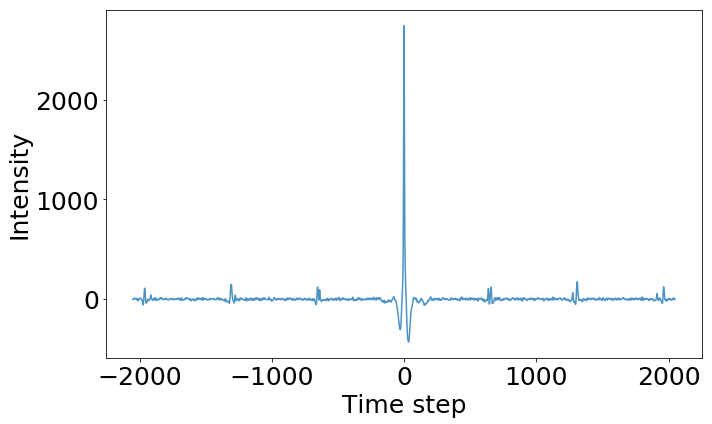

In [16]:
slicepulse = slicesum/pulsecount

plt.figure(figsize=(10, 6))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.xlabel('Time step')
plt.ylabel('Intensity')
plt.plot(np.arange(slicepulse.size) - slicepulse.size/2, slicepulse, alpha = 0.8)
plt.tight_layout()
np.save('slicepulse', slicepulse, allow_pickle = True, fix_imports=True)
plt.savefig('/home/inigo/pulseClassifier/notebooks/graphs/slicepulse.png')

In [ ]:
import numpy.fft

slicepulseft = np.fft.fft(slicepulse)
np.save('slicepulseft', slicepulseft, allow_pickle=True, fix_imports = True)
plt.plot(slicepulseft, alpha = 0.8)
plt.savefig('./slicepulseft.png')